In [23]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('dataset.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [29]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [31]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [33]:
df.shape

(9551, 21)

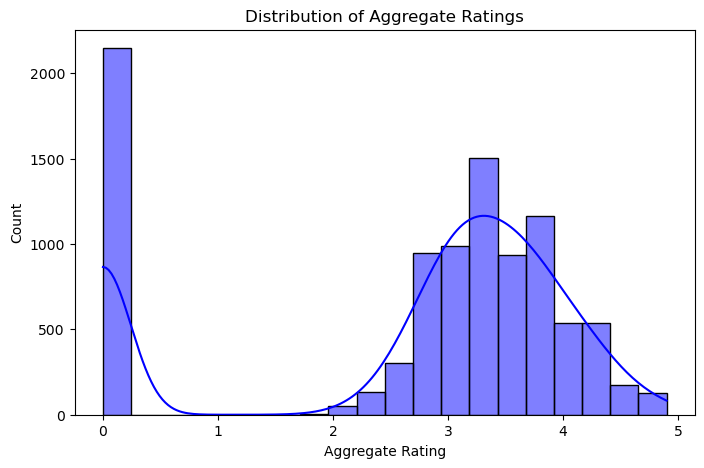

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Aggregate rating"], bins=20, kde=True, color="blue")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

# Restaurant Ratings Analysis

## Overview
Most restaurants have an aggregate rating between **3.0 and 4.5**, suggesting generally positive customer feedback. However, only a **small fraction** reach the **highest rating of 5.0**, indicating **exceptional service, food quality, and customer satisfaction**. 

### Key Insights:
- The **average rating range** for most restaurants is **3.0 to 4.5**, reflecting overall good experiences.
- Only **a few establishments** attain a **5.0 rating**, signifying **consistent excellence**.
- Understanding these ratings helps customers make informed dining decisions and allows restaurant owners to gauge their performance against competitors.

This analysis provides a **deeper perspective** on how restaurants are rated and what it takes to achieve the highest distinction.

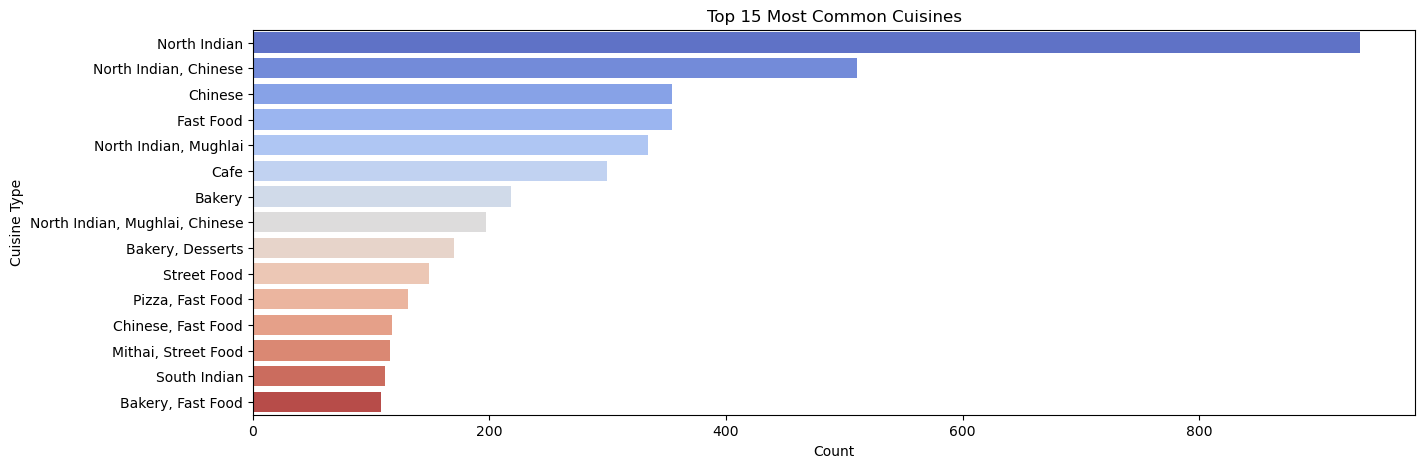

In [21]:
plt.figure(figsize=(15, 5))
top_cuisines = df["Cuisines"].value_counts().head(15)
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="coolwarm")
plt.title("Top 15 Most Common Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine Type")
plt.show()

# Popular Cuisines in the Restaurant Industry  

## Overview  
The restaurant industry is shaped by a variety of cuisines, with **Indian, Chinese, Fast Food, Café, and Bakery** being the most prevalent. These cuisines appeal to a broad audience due to their diverse flavors, accessibility, and cultural significance.  

### Key Insights:  
- **Indian Cuisine**: Rich in spices and flavors, offering traditional and regional specialties.  
- **Chinese Cuisine**: Popular for its balance of flavors, including sweet, sour, salty, and umami-rich dishes.  
- **Fast Food**: Known for its quick service and convenience, catering to a fast-paced lifestyle.  
- **Café Culture**: A hub for coffee enthusiasts, light snacks, and social gatherings.  
- **Bakery Products**: Loved for fresh bread, pastries, and desserts, appealing to both casual and gourmet dining preferences.  

This breakdown highlights the **widespread popularity** of these cuisines and their role in shaping **global dining trends**.  

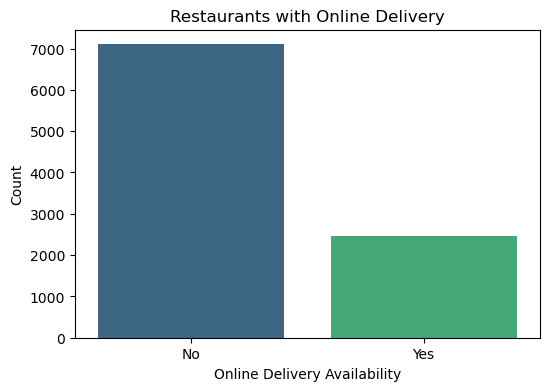

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Has Online delivery"], palette="viridis")
plt.title("Restaurants with Online Delivery")
plt.xlabel("Online Delivery Availability")
plt.ylabel("Count")
plt.show()

# Online Delivery Trends in Restaurants  

## Overview  
Online delivery services are **not widely available** in most restaurants, suggesting that the **dine-in culture remains dominant**. This highlights the importance of in-person dining experiences, where ambiance, service, and social interactions enhance customer satisfaction.  

### Key Insights:  
- **Limited Online Delivery**: Many restaurants prioritize **in-person dining** over digital ordering services.  
- **Customer Preferences**: The preference for **dining out** suggests that restaurant ambiance and personal service remain highly valued.  
- **Industry Impact**: While food delivery is growing, traditional restaurants may focus more on enhancing their **dine-in experience** rather than expanding delivery options.  

This insight underscores the continued **importance of in-person dining experiences** despite the rising trend of online food delivery.  

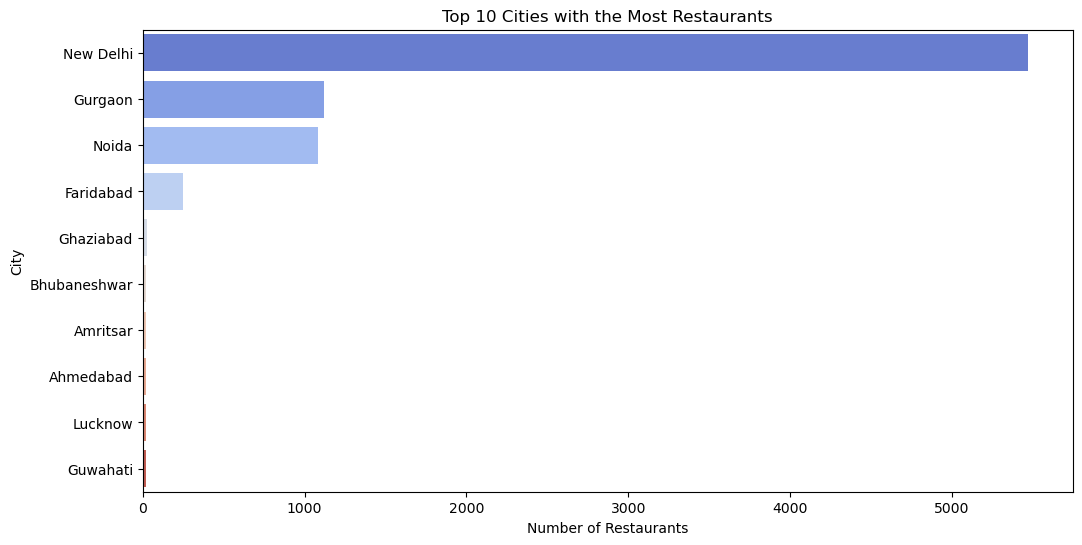

In [40]:
plt.figure(figsize=(12, 6))
top_cities = df["City"].value_counts().head(10)
sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")
plt.title("Top 10 Cities with the Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

# Restaurant Distribution Across Cities  

## Overview  
The number of restaurants varies significantly across cities, with **New Delhi, Gurgaon, Noida, and Faridabad** having the highest concentrations. This suggests that these cities are key **urban and commercial centers**, likely benefiting from higher population density, economic activity, and tourism.  

### Key Insights:  
- **Urban Centers**: Major cities tend to have more restaurants due to **higher population density and economic growth**.  
- **Tourism Influence**: Popular tourist destinations often attract more dining establishments to cater to **diverse visitor preferences**.  
- **Business & Lifestyle**: Cities with a strong corporate presence and modern lifestyle trends contribute to a **thriving restaurant industry**.  

This pattern highlights how **demographics, tourism, and economic factors shape the restaurant landscape across different cities**.  


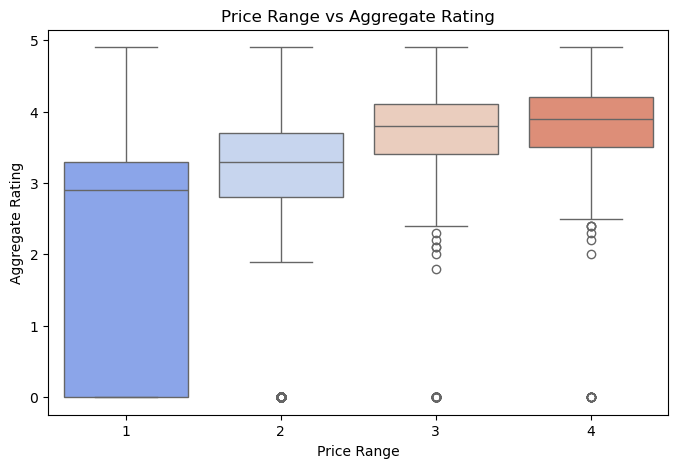

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Price range", y="Aggregate rating", palette="coolwarm")
plt.title("Price Range vs Aggregate Rating")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()

# Relationship Between Price and Restaurant Ratings  

## Overview  
Higher-priced restaurants typically receive **better ratings**, suggesting that **premium dining experiences** often lead to greater customer satisfaction. However, some **affordable restaurants** also achieve high ratings, indicating that **quality food and service** can outweigh pricing factors.  

### Key Insights:  
- **Premium Dining**: Expensive restaurants tend to have **higher ratings**, possibly due to better ambiance, service, and food quality.  
- **Affordable Excellence**: Some **low-cost restaurants** receive high ratings, proving that exceptional food and customer service can drive customer loyalty.  
- **Customer Expectations**: Higher-priced venues may face **greater expectations**, while budget-friendly spots can impress with **value for money**.  

This analysis highlights that while **price often correlates with quality, great dining experiences can be found at all price points**.  

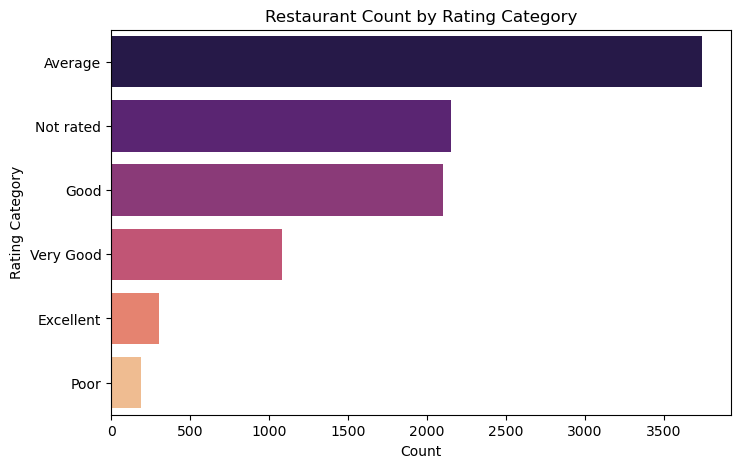

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(y="Rating text", data=df, palette="magma", order=df["Rating text"].value_counts().index)
plt.title("Restaurant Count by Rating Category")
plt.xlabel("Count")
plt.ylabel("Rating Category")
plt.show()

# Distribution of Restaurant Ratings  

## Overview  
Most restaurants fall within the **"Good"** and **"Very Good"** rating categories, indicating that the majority provide satisfactory to above-average dining experiences. **Fewer restaurants** receive **"Poor"** ratings, suggesting that low-quality establishments are less common, while only a **select few** achieve the **"Excellent"** distinction.  

### Key Insights:  
- **Majority of Restaurants**: Most establishments maintain **decent to high standards**, earning **"Good" or "Very Good"** ratings.  
- **Lower Occurrence of Poor Ratings**: Restaurants with **"Poor"** ratings are relatively rare, implying that most businesses meet basic quality expectations.  
- **Rarity of Excellence**: Only a **small fraction** reach the **"Excellent"** rating, signifying exceptional food, service, and overall experience.  

This analysis highlights that while **most restaurants provide quality service, only a few stand out as truly exceptional**.  

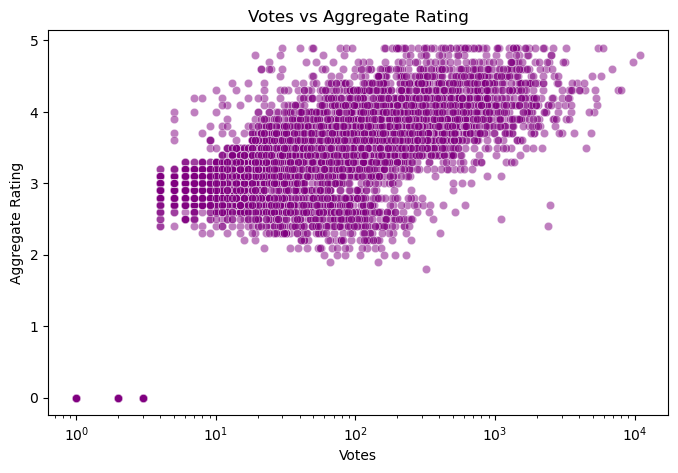

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Votes", y="Aggregate rating", data=df, alpha=0.5, color="purple")
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.xscale("log") 
plt.show()

# Correlation Between Votes and Ratings  

## Overview  
Restaurants with **more votes** tend to have **higher ratings**, suggesting that **popular establishments** often receive strong customer approval. However, some **highly rated restaurants** have **fewer votes**, indicating that **exceptional quality can be recognized even with limited feedback**.  

### Key Insights:  
- **Popularity & Ratings**: Higher vote counts generally correlate with **better ratings**, as more customers validate the restaurant’s quality.  
- **Hidden Gems**: Some **lesser-known restaurants** receive **excellent ratings despite fewer votes**, highlighting their outstanding food and service.  
- **Customer Influence**: While large vote counts can indicate credibility, even restaurants with **limited feedback** can achieve **top ratings** if they consistently deliver excellence.  

This analysis suggests that while **popularity often aligns with quality, hidden gems with fewer votes can still offer remarkable dining experiences**.  

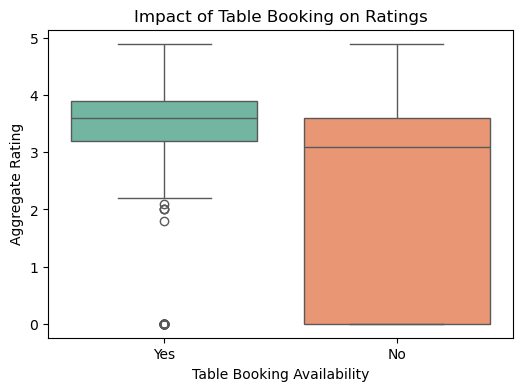

In [52]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Has Table booking", y="Aggregate rating", data=df, palette="Set2")
plt.title("Impact of Table Booking on Ratings")
plt.xlabel("Table Booking Availability")
plt.ylabel("Aggregate Rating")
plt.show()

# Impact of Table Booking on Restaurant Ratings  

## Overview  
Restaurants that provide **table booking services** tend to have **higher average ratings**, indicating a potential link between **structured reservations and customer satisfaction**. This suggests that **better service, efficient management, and a more organized dining experience** contribute to higher customer approval.  

### Key Insights:  
- **Higher Ratings**: Restaurants offering **table booking** typically receive **better reviews**, possibly due to improved service quality.  
- **Service Efficiency**: Structured reservations help **manage customer flow**, reducing wait times and enhancing the dining experience.  
- **Enhanced Customer Experience**: The ability to book a table in advance may indicate a **more professional and well-organized establishment**.  

This analysis highlights that **offering table reservations may contribute to an overall superior dining experience and higher customer satisfaction**.  

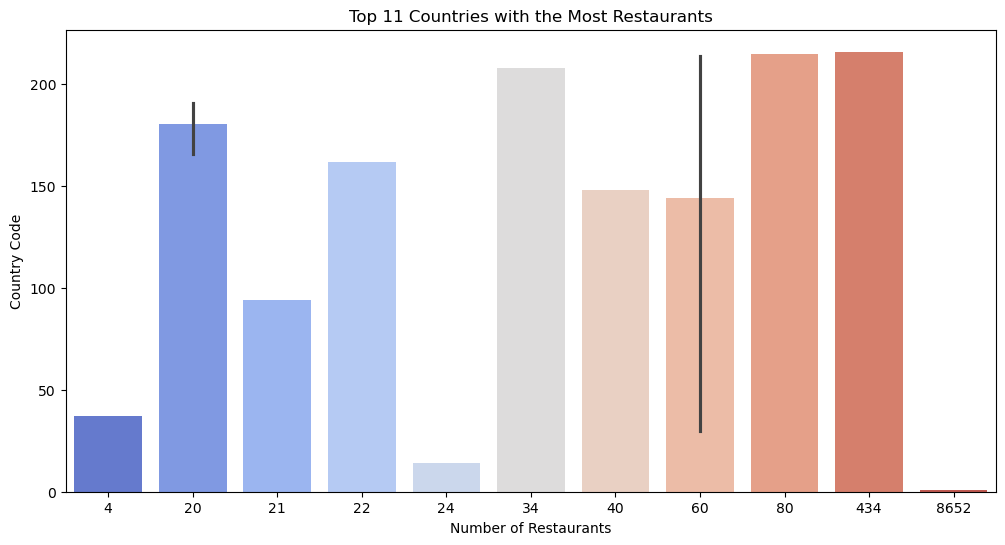

In [55]:
plt.figure(figsize=(12, 6))
top_countries = df["Country Code"].value_counts().head(15)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.title("Top 11 Countries with the Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Country Code")
plt.show()

# Global Distribution of Restaurants  

## Overview  
The restaurant industry is **highly concentrated** in a few key countries, with one nation having an **overwhelmingly higher number of restaurants** compared to others. This indicates that **restaurant density is not evenly distributed** and is influenced by factors such as **population, economy, and cultural dining habits**.  

### Key Insights:  
- **Industry Dominance**: A **small number of countries** account for the majority of restaurants, shaping global dining trends.  
- **Regional Density**: The restaurant industry is **densely packed in specific regions**, likely due to **urbanization and economic growth**.  
- **Cultural Influence**: Countries with **strong food culture and tourism** tend to have a **higher concentration of restaurants**.  

This analysis highlights that **restaurant density is driven by regional factors, making some countries the epicenters of the global dining industry**.  

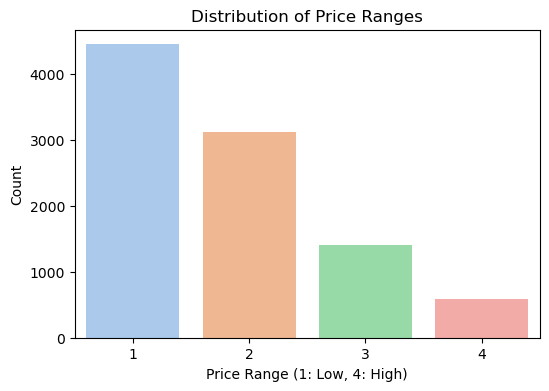

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Price range"], palette="pastel")
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range (1: Low, 4: High)")
plt.ylabel("Count")
plt.show()

# Price Range Distribution in Restaurants  

## Overview  
Most restaurants belong to the **lower price ranges (1 & 2)**, highlighting the dominance of **affordable dining options** in the industry. In contrast, **high-end restaurants (3 & 4) are relatively scarce**, suggesting that **premium dining experiences cater to a niche audience**.  

### Key Insights:  
- **Market Preference**: The majority of restaurants **offer budget-friendly options**, making dining accessible to a broader population.  
- **Exclusive Fine Dining**: Higher-end restaurants are **less common**, likely targeting a **smaller, more affluent customer base**.  
- **Economic Influence**: The restaurant industry favors **affordable pricing models**, aligning with **consumer demand and spending habits**.  

This analysis suggests that **while most restaurants focus on affordability, premium dining remains an exclusive segment of the market**.  